Importaciones

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Carga del conjunto de datos

In [2]:
# Cargar el conjunto de datos CIFAR-10
(train_images_10, train_labels_10), (test_images_10, test_labels_10) = datasets.cifar10.load_data()

# Cargar el conjunto de datos CIFAR-100
(train_images_100, train_labels_100), (test_images_100, test_labels_100) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 10s 0us/step


Normalización de los datos

In [3]:
# Normalizar los valores de píxeles a un rango de 0 a 1 para CIFAR-10
train_images_10, test_images_10 = train_images_10 / 255.0, test_images_10 / 255.0

# Normalizar los valores de píxeles a un rango de 0 a 1 para CIFAR-100
train_images_100, test_images_100 = train_images_100 / 255.0, test_images_100 / 255.0

Construcción del modelo

In [4]:
# Crear un modelo secuencial
model = models.Sequential()

# Agregar la primera capa convolucional y de MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Agregar una segunda capa convolucional y de MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Agregar una tercera capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar las salidas de las capas anteriores para conectarlas a las capas densas
model.add(layers.Flatten())

# Agregar la primera capa completamente conectada
model.add(layers.Dense(64, activation='relu'))

# Agregar la segunda capa completamente conectada con salida softmax
model.add(layers.Dense(10, activation='softmax'))  # Para CIFAR-10, cambia a 100 para CIFAR-100

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compilación del modelo

In [5]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Entrenamiento del modelo

In [8]:
# Entrenar el modelo con CIFAR-10
history_10 = model.fit(
    train_images_10, train_labels_10,
    epochs=2,
    validation_data=(test_images_10, test_labels_10)
)



Epoch 1/2
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3265 - accuracy: 0.8832 - val_loss: 1.1855 - val_accuracy: 0.6952
Epoch 2/2
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3071 - accuracy: 0.8895 - val_loss: 1.2746 - val_accuracy: 0.6861


In [12]:
# Import necessary module
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Redefine the model to include a new final layer for CIFAR-100
model = Sequential([
    # ... existing layers
    Flatten(),
    Dense(100, activation='softmax')  # New final layer with 100 units for CIFAR-100
])

# Recompile the model with the new final layer
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with CIFAR-100
history_100 = model.fit(
    train_images_100, train_labels_100,
    epochs=2,
    validation_data=(test_images_100, test_labels_100)
)

Epoch 1/2
1563/1563 [==============================] - 15s 9ms/step - loss: 4.4521 - accuracy: 0.0912 - val_loss: 4.4968 - val_accuracy: 0.1002
Epoch 2/2
1563/1563 [==============================] - 11s 7ms/step - loss: 4.2146 - accuracy: 0.1240 - val_loss: 4.3208 - val_accuracy: 0.1199


Evaluación del modelo

In [13]:
# Evaluar el modelo en el conjunto de entrenamiento para CIFAR-10
train_loss_10, train_accuracy_10 = model.evaluate(train_images_10, train_labels_10, verbose=2)
print(f"Precisión en el conjunto de entrenamiento (CIFAR-10): {train_accuracy_10*100:.2f}%")

# Evaluar el modelo en el conjunto de prueba para CIFAR-10
test_loss_10, test_accuracy_10 = model.evaluate(test_images_10, test_labels_10, verbose=2)
print(f"Precisión en el conjunto de prueba (CIFAR-10): {test_accuracy_10*100:.2f}%")

# Evaluar el modelo en el conjunto de entrenamiento para CIFAR-100
train_loss_100, train_accuracy_100 = model.evaluate(train_images_100, train_labels_100, verbose=2)
print(f"Precisión en el conjunto de entrenamiento (CIFAR-100): {train_accuracy_100*100:.2f}%")

# Evaluar el modelo en el conjunto de prueba para CIFAR-100
test_loss_100, test_accuracy_100 = model.evaluate(test_images_100, test_labels_100, verbose=2)
print(f"Precisión en el conjunto de prueba (CIFAR-100): {test_accuracy_100*100:.2f}%")


1563/1563 - 3s - loss: 6.1919 - accuracy: 0.0035 - 3s/epoch - 2ms/step
Precisión en el conjunto de entrenamiento (CIFAR-10): 0.35%
313/313 - 1s - loss: 6.2121 - accuracy: 0.0041 - 1s/epoch - 4ms/step
Precisión en el conjunto de prueba (CIFAR-10): 0.41%
1563/1563 - 3s - loss: 4.0695 - accuracy: 0.1454 - 3s/epoch - 2ms/step
Precisión en el conjunto de entrenamiento (CIFAR-100): 14.54%
313/313 - 1s - loss: 4.3208 - accuracy: 0.1199 - 693ms/epoch - 2ms/step
Precisión en el conjunto de prueba (CIFAR-100): 11.99%


Visualización de resultados

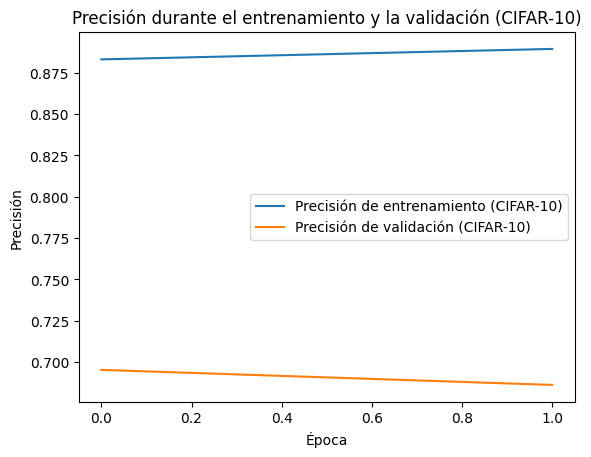

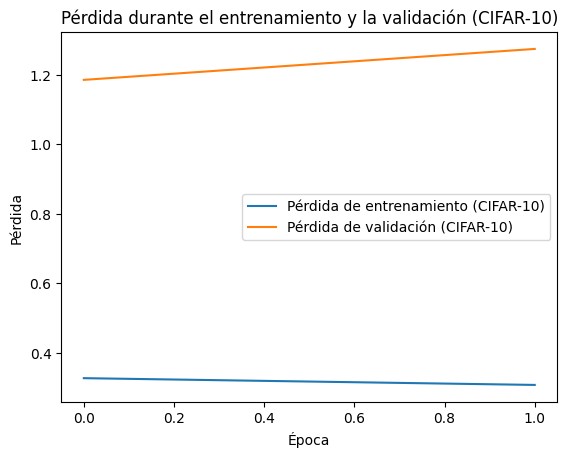

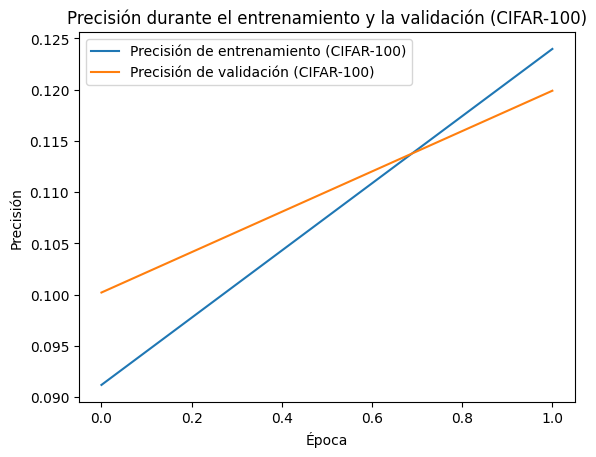

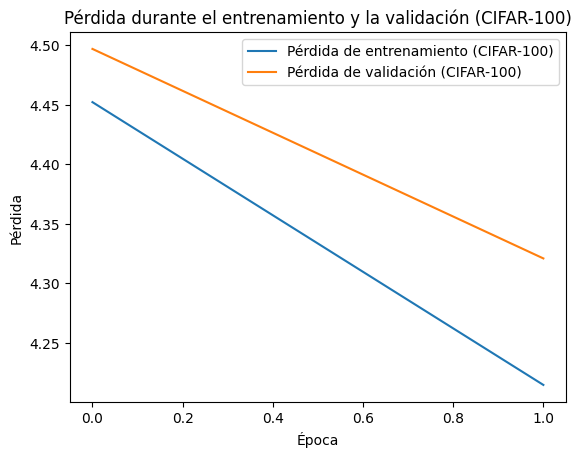

In [14]:
import matplotlib.pyplot as plt

# Graficar precisión del entrenamiento y validación para CIFAR-10
plt.plot(history_10.history['accuracy'], label='Precisión de entrenamiento (CIFAR-10)')
plt.plot(history_10.history['val_accuracy'], label='Precisión de validación (CIFAR-10)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento y la validación (CIFAR-10)')
plt.show()

# Graficar pérdida del entrenamiento y validación para CIFAR-10
plt.plot(history_10.history['loss'], label='Pérdida de entrenamiento (CIFAR-10)')
plt.plot(history_10.history['val_loss'], label='Pérdida de validación (CIFAR-10)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento y la validación (CIFAR-10)')
plt.show()

# Graficar precisión del entrenamiento y validación para CIFAR-100
plt.plot(history_100.history['accuracy'], label='Precisión de entrenamiento (CIFAR-100)')
plt.plot(history_100.history['val_accuracy'], label='Precisión de validación (CIFAR-100)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento y la validación (CIFAR-100)')
plt.show()

# Graficar pérdida del entrenamiento y validación para CIFAR-100
plt.plot(history_100.history['loss'], label='Pérdida de entrenamiento (CIFAR-100)')
plt.plot(history_100.history['val_loss'], label='Pérdida de validación (CIFAR-100)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento y la validación (CIFAR-100)')
plt.show()


Imágenes de prueba con etiquetas reales

313/313 [==============================] - 1s 2ms/step


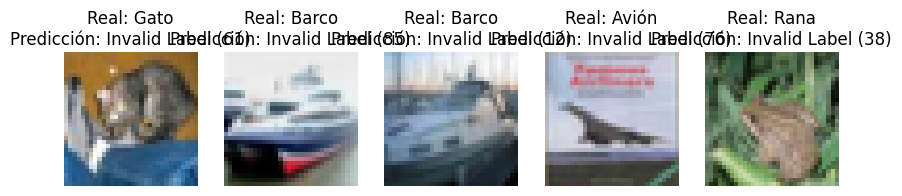

313/313 [==============================] - 1s 4ms/step


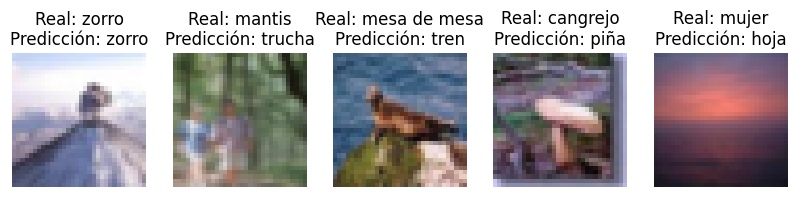

In [20]:
# Definir un mapa de etiquetas para CIFAR-10
class_names_10 = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Venado',
                  'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Obtener predicciones para el conjunto de prueba de CIFAR-10
predictions_10 = model.predict(test_images_10)

# Mostrar algunas imágenes con etiquetas reales y predicciones
num_images = 5
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images_10[i])
    predicted_label = np.argmax(predictions_10[i])
    # Check if predicted label is within the valid range
    if predicted_label < len(class_names_10):
        plt.title(f"Real: {class_names_10[test_labels_10[i][0]]}\n"
                  f"Predicción: {class_names_10[predicted_label]}")
    else:
        plt.title(f"Real: {class_names_10[test_labels_10[i][0]]}\n"
                  f"Predicción: Invalid Label ({predicted_label})") # Indicate an invalid prediction
    plt.axis('off')
plt.show()

# Repetir el proceso para CIFAR-100 si es necesario
# Definir un mapa de etiquetas para CIFAR-100
# (Asegúrate de tener las etiquetas correctas y el modelo adecuado cargado)
class_names_100 = [
    'manzana', 'pecera', 'bebé', 'oso', 'castor',
    'mariposa', 'lata', 'reloj', 'nube', 'cucaracha',
    'taza', 'dinosaurio', 'elefante', 'lámpara', 'león',
    'lagarto', 'mapache', 'mandolina', 'naranja', 'pera',
    'piña', 'planta', 'conejo', 'burbuja', 'rata',
    'rosado', 'palo de hockey', 'palo de golf', 'esfera', 'sombrero',
    'guante', 'mesa', 'cabeza de serpiente', 'mantis', 'hongo',
    'césped', 'margarita', 'delfín', 'mariposa', 'garza',
    'sol', 'semáforo', 'trucha', 'semillas', 'araña',
    'helicóptero', 'toro', 'tortuga', 'ballena', 'zorro',
    'castor', 'cangrejo', 'herido', 'cama', 'caballo',
    'hipopótamo', 'castor', 'botella', 'pez', 'carro',
    'silla', 'bikini', 'casa', 'camión', 'bicicleta',
    'barril', 'ferry', 'hamburguesa', 'elefante', 'kivi',
    'hombre', 'mujer', 'mesa de mesa', 'falda', 'niño',
    'perro', 'gato', 'laptop', 'león', 'manzana',
    'nariz', 'nuez', 'televisor', 'pajaro', 'avión',
    'puerta', 'pollo', 'piña', 'elefante', 'tren',
    'camión', 'banco', 'hoja', 'tractor', 'tulipán',
    'rosa', 'castor', 'tortuga', 'tigre', 'cangrejo',
    'caballo', 'león', 'cebra', 'planta', 'piscina',
    'tigre', 'plátano', 'limón', 'libro', 'cámara'
]
  # Lista de 100 nombres de clases

# Obtener predicciones para el conjunto de prueba de CIFAR-100
predictions_100 = model.predict(test_images_100)

# Mostrar algunas imágenes con etiquetas reales y predicciones
num_images = 5
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images_100[i])
    predicted_label = np.argmax(predictions_100[i])
    # Check if predicted label is within the valid range
    if predicted_label < len(class_names_100):
      plt.title(f"Real: {class_names_100[test_labels_100[i][0]]}\n"
                f"Predicción: {class_names_100[np.argmax(predictions_100[i])]}")
    else:
      plt.title(f"Real: {class_names_100[test_labels_100[i][0]]}\n"
                f"Predicción: Invalid Label ({predicted_label})") # Indicate an invalid prediction
    plt.axis('off')
plt.show()
